# MicroGrad Demo
will largely follow karpathy's demo notebook (again lmao)

In [15]:
# imports
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
# some scripts so that micrograd is recognized as a module
import setup_paths

# imports from micrograd lfg
from micrograd.engine import Value
from micrograd.nn import Neuron, Layer, MLP

In [81]:
# random seeds
# karpathy's
np.random.seed(1337)
random.seed(1337)

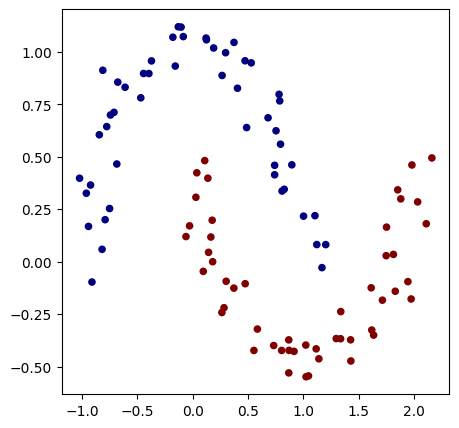

In [82]:
# make up a dataset
from sklearn.datasets import make_moons, make_blobs
X, y = make_moons(n_samples=100, noise=0.1)
# the make_moons functions make crescents
# and returns a tuple of coordinates
# and their respective categories

y = y*2 - 1 # y is either 0 or 1, this is to map 0 to -1 and 1 to 1
# visualization in 2d
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')

# Plot the data
# plt.figure(figsize=(8, 6))
# plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', label='Class 0')
# plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Class 1')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.title('Moons Dataset')
# plt.legend()
# plt.show()

In [85]:
# initialize a model
model = MLP(2, [16, 16, 1]) # a 2-layer neural network/multi-layer perceptrons
# why does it take in two inputs at first? because there are straightforwardly two-features, the X is scattered
# on a 2d space
# you can adjust the numbers of neurons in the layers and the number of layers as you wish
print(model)
print("number of parameters", len(model.parameters()))

MLP of [Layer of [ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2)], Layer of [ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16)], Layer of [LinearNeuron(16)]]
number of parameters 337


In [86]:
# define the loss function
def loss(batch_size=None):
  # inline dataloader (???)
  if batch_size is None:
    # if batch_size is not inputted/None
    # then the whole training dataset is the batch
    Xb, yb = X, y
  else:
    # else, 
    ri = np.random.permutation(X.shape[0])[:batch_size]
    Xb, yb = X[ri], y[ri]
  inputs = [list(map(Value, xrow)) for xrow in Xb]
  
  # forward pass
  scores = list(map(model, inputs)) # model, X, y is global here lmao

  # hinge loss in svm (support vector machines)
  # "max-margin" loss
  # relu because relu(x) is max(0, x)
  # essentially calculates how far off you are from the right classification
  # and doesn't reward you with negative loss when you're really confident in your classification
  # y is either -1 or 1; scorei can be anywhere in the real number
  # see if yi is -1 and scorei -1 loss is zero
  # if yi is 1 and scorei -1 loss is two
  # if yi is 1 and scorei 10 loss is zero
  losses = [(1 + -yi*scorei).relu() for yi, scorei in zip(yb, scores)]
  # normalize by the length of losses (ie. mean loss)
  data_loss = sum(losses) * 1.0/len(losses)

  # L2 regularizaiton
  alpha = 1e-4
  reg_loss = alpha * sum((p*p for p in model.parameters()))
  # what's happening here is that we want to penalize the model if
  # it has too large weights, ie. too sparse, too dependent on certain params
  # prevents overfitting, and stabilizes training because it prevents model from being too 
  # confident on one param

  # total_loss
  total_loss = data_loss + reg_loss

  # and accuracy
  # decision boundary is 0
  # so (0, +inf) is 1 and (-inf, 0] is -1 (?)
  accuracy = [(yi>0) == (scorei.data>0) for yi, scorei in zip(yb, scores)]
  mean_accuracy = sum(accuracy) * 1.0/len(accuracy)

  return total_loss, mean_accuracy

total_loss, mean_accuracy = loss()
print(total_loss, mean_accuracy) # naming is a bit bad here lmao
# accuracy is 5, essentially random haha
# model is initialized in different memory addresses it seems so even tho there's seed
# it's not exactly the same as karpathy's

Value(label='', data=0.7699368949182647,  grad=0) 0.75


In [90]:
# optimization
for i in range(100):
  # forward pass
  total_loss, mean_accuracy = loss()

  # backward pass
  model.zero_grad()
  total_loss.backward()

  # grad descent
  # step = 1e-2 # karpathy uses the term learning_rate here; emphasizing that we can make this depend on the step by some kind of schedule
  step = 1.0 - (0.9*i/100) # meaning this will linearly start from 1.0 and goes down to 0.1 from step 0 to 99
  # essentially hyperparameter tuning
  for p in model.parameters():
    p.data -= step * p.grad
  
  if i%1 == 0:
    print(f"step {i} loss {total_loss.data}, accuracy {mean_accuracy*100}%")

step 0 loss 0.38828850694461514, accuracy 79.0%
step 1 loss 0.3182928978314352, accuracy 88.0%
step 2 loss 0.6140445078684819, accuracy 76.0%
step 3 loss 4.9821399017825865, accuracy 50.0%
step 4 loss 0.5860476392640561, accuracy 75.0%
step 5 loss 0.40680571896734413, accuracy 82.0%
step 6 loss 0.3885841333294502, accuracy 81.0%
step 7 loss 0.3836604246708057, accuracy 80.0%
step 8 loss 0.35656293735152256, accuracy 82.0%
step 9 loss 0.345810911580488, accuracy 82.0%
step 10 loss 0.33295253248116324, accuracy 84.0%
step 11 loss 0.3256524923409427, accuracy 85.0%
step 12 loss 0.31652208696815404, accuracy 85.0%
step 13 loss 0.30531435906411714, accuracy 89.0%
step 14 loss 0.28542409870913127, accuracy 87.0%
step 15 loss 0.26614880902808224, accuracy 89.0%
step 16 loss 0.2410463353449079, accuracy 90.0%
step 17 loss 0.2309819214319832, accuracy 91.0%
step 18 loss 0.2249187174702901, accuracy 92.0%
step 19 loss 0.2104864408619134, accuracy 91.0%
step 20 loss 0.1965064569021097, accuracy 9

(-5.548639298268643, 5.951360701731357)

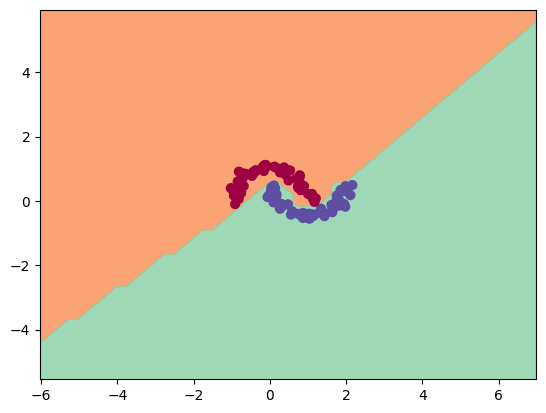

In [99]:
# visualize decision boundary

# setup the meshgrid
h = 0.25 # the resolution of the meshgrid
# the max and min of x and y, added by 1 to give space
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# # look how this looks like OOD (out of distribution)
# pad = 5 # takes so long because O(n**2) ??
# # takes 2 mins to do this
# x_min, x_max = X[:, 0].min() - pad, X[:, 0].max() + pad
# y_min, y_max = X[:, 1].min() - pad, X[:, 1].max() + pad
# # 
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
#                      np.arange(y_min, y_max, h))

# prep the input data
# np.c_ is such an arcane routine what in the heck is this
# essentially you make a list of list out of a flattened separate list of coords
# like zip but for np arrays
Xmesh = np.c_[xx.ravel(), yy.ravel()]
# make them all into Value objects
inputs = [list(map(Value, xrow)) for xrow in Xmesh]

# compute model scores
scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

## scratchpad

In [ ]:
# say we have X and y
from sklearn.datasets import make_moons, make_blobs
X, y = make_moons(n_samples=100, noise=0.1)
y = y*2 - 1 # y is either 0 or 1, this is to map 0 to -1 and 1 to 1

# what ri does is so
batch_size = 20
# ri = np.random.permutation(6)
ri = np.random.permutation(X.shape[0])[:batch_size]
# len(ri)
# ri
# Xb, yb = X[ri], y[ri]
# # X[ri]
# # y[ri]
# so ri is a numpy array

# and with numy arrays, this works (wtf haha)
# np.array([[0,0], [1,1], [2,2], [3,3], [4,4], [5,5], [6,6], [7,7]])[np.array([5, 3])]

# inputs = [list(map(Value, xrow)) for xrow in Xb]
# inputs

array([45, 78, 83, 14, 66, 99, 75,  6, 86, 60, 88, 13, 19, 94, 77, 23, 47,
       93, 22, 84])

In [113]:
# setup the meshgrid
h = 0.25 # the resolution of the meshgrid
# the max and min of x and y, added by 1 to give space
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
# xx.ravel()
# xx
# yy
# x_max
# list(zip(xx, yy))
# xx.ravel()
# np.c_[xx.ravel(), yy.ravel()]


array([[-2.02219391, -1.5486393 ],
       [-1.77219391, -1.5486393 ],
       [-1.52219391, -1.5486393 ],
       [-1.27219391, -1.5486393 ],
       [-1.02219391, -1.5486393 ],
       [-0.77219391, -1.5486393 ],
       [-0.52219391, -1.5486393 ],
       [-0.27219391, -1.5486393 ],
       [-0.02219391, -1.5486393 ],
       [ 0.22780609, -1.5486393 ],
       [ 0.47780609, -1.5486393 ],
       [ 0.72780609, -1.5486393 ],
       [ 0.97780609, -1.5486393 ],
       [ 1.22780609, -1.5486393 ],
       [ 1.47780609, -1.5486393 ],
       [ 1.72780609, -1.5486393 ],
       [ 1.97780609, -1.5486393 ],
       [ 2.22780609, -1.5486393 ],
       [ 2.47780609, -1.5486393 ],
       [ 2.72780609, -1.5486393 ],
       [ 2.97780609, -1.5486393 ],
       [-2.02219391, -1.2986393 ],
       [-1.77219391, -1.2986393 ],
       [-1.52219391, -1.2986393 ],
       [-1.27219391, -1.2986393 ],
       [-1.02219391, -1.2986393 ],
       [-0.77219391, -1.2986393 ],
       [-0.52219391, -1.2986393 ],
       [-0.27219391,